In [16]:
from construct_eq_fpr_df import construct_df_for_eq_div_fpr
from construct_eq_fpr_df import get_fpr_eq_div
from get_data_fico import get_fpr_tpr_fico
import matplotlib.pylab as plt 
from responsibly.dataset import build_FICO_dataset
from onehalfthreshold import get_optimal_fp_tp
from onehalfthreshold import get_indices_for_a_opt
from onehalfthreshold import get_fpa_opt_tpa_opt_thres_a_opt
from matplotlib.font_manager import FontProperties

In [17]:
#list of attributes are Asian, Hispanic, Black, White 
fpr_df, tpr_df = get_fpr_tpr_fico()
data_fpr_Asian = fpr_df['Asian']
data_tpr_Asian = tpr_df['Asian']

data_fpr_Hispanic = fpr_df['Hispanic']
data_tpr_Hispanic = tpr_df['Hispanic']

data_fpr_Black = fpr_df['Black']
data_tpr_Black = tpr_df['Black']

data_fpr_White = fpr_df['White']
data_tpr_White = tpr_df['White']

In [18]:
eq_fpr_df = construct_df_for_eq_div_fpr(fpr_df,tpr_df)
print(eq_fpr_df)

Index(['Asian', 'Black', 'Hispanic', 'White'], dtype='object')
     Asian_tpr Asian_threshold Black_tpr Black_threshold Hispanic_tpr  \
0.00         0             101         0             100            0   
0.01  0.208004         83.5315   0.28234          59.954     0.244266   
0.02  0.305074         76.7585  0.407198         49.5555     0.340156   
0.03  0.366317         72.2048   0.48769         44.3485     0.413364   
0.04  0.415311         67.8275  0.546138         41.2037      0.47262   
...        ...             ...       ...             ...          ...   
0.95  0.999261         1.88255  0.998966         1.26112     0.999245   
0.96  0.999414          1.4599  0.999205         1.18002     0.999406   
0.97  0.999562          1.3232  0.999445         1.09892     0.999566   
0.98   0.99971         1.18649  0.999684         1.01782     0.999727   
0.99  0.999857         1.04978  0.999856        0.767093     0.999884   

     Hispanic_threshold White_tpr White_threshold  
0.00    

In [19]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

     Asian_tpr Black_tpr Hispanic_tpr White_tpr
0.00         0         0            0         0
0.01  0.208004   0.28234     0.244266  0.241511
0.02  0.305074  0.407198     0.340156   0.41111
0.03  0.366317   0.48769     0.413364  0.515909
0.04  0.415311  0.546138      0.47262  0.587638
...        ...       ...          ...       ...
0.95  0.999261  0.998966     0.999245  0.999584
0.96  0.999414  0.999205     0.999406  0.999677
0.97  0.999562  0.999445     0.999566  0.999763
0.98   0.99971  0.999684     0.999727  0.999849
0.99  0.999857  0.999856     0.999884  0.999934

[100 rows x 4 columns]


In [20]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div())
min_tpr = list(pointwise_min_df)

0.00    0.000000
0.01    0.208004
0.02    0.305074
0.03    0.366317
0.04    0.415311
          ...   
0.95    0.998966
0.96    0.999205
0.97    0.999445
0.98    0.999684
0.99    0.999856
Length: 100, dtype: float64


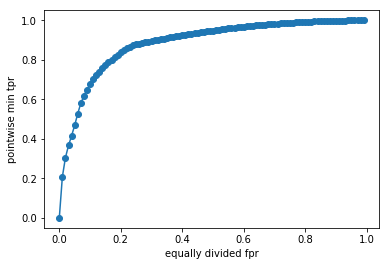

In [21]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

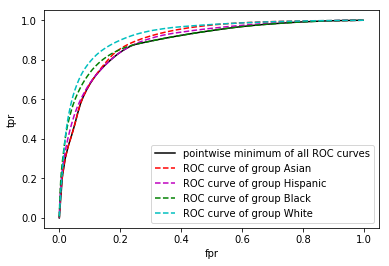

In [22]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'--r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [23]:
#Showing opt for a particular loss function ratio 
loss_fn,loss_fp = 0.3,0.2 #cost of a non-defaulter not getting a loan, cost of a defaulter getting a loan
opt_fp, opt_tp = get_optimal_fp_tp(loss_fn,loss_fp,pointwise_min_df)
print('optimal fp:', opt_fp)
print('optimal tp:', opt_tp)

optimal fp: 0.24
optimal tp: 0.8733092020364959


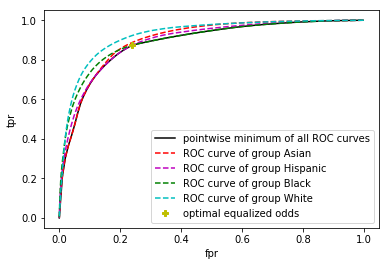

In [24]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'--r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.plot(opt_fp,opt_tp,'Py',label = 'optimal equalized odds')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [25]:
opt_slope = opt_tp/opt_fp
list_attrs = ['Asian','Hispanic','White','Black']
for attr in list_attrs: 
    tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
    found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr)-1)
    #print(found_index_1)
    #print(found_index_2)
    threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
    fpr_1 = eq_fpr[found_index_1]
    fpr_2 = eq_fpr[found_index_2]
    tpr_1 = tp_attr_list[found_index_1]
    tpr_2 = tp_attr_list[found_index_2]
    threshold_1 = threshold_attr_list[found_index_1]
    threshold_2 = threshold_attr_list[found_index_2]
    fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
    p_a = opt_fp/fpa_opt #=opt_tp/tpa_opt
    print('Opt false positive for group '+attr+':',fpa_opt)
    print('Opt true positive for group '+attr+':',tpa_opt)
    print('Opt threshold for group '+attr+':',threshold_a_opt)
    print('Opt probablity p_a group '+attr+':',p_a)
    

Opt false positive for group Asian: 0.2448234786072924
Opt true positive for group Asian: 0.8908608197597235
Opt threshold for group Asian: 33.99140548243055
Opt probablity p_a group Asian: 0.980298137111966
Opt false positive for group Hispanic: 0.24
Opt true positive for group Hispanic: 0.8733092020364959
Opt threshold for group Hispanic: 27.195188490111956
Opt probablity p_a group Hispanic: 1.0
Opt false positive for group White: 0.2556665200515604
Opt true positive for group White: 0.9303163525569832
Opt threshold for group White: 28.629857731087093
Opt probablity p_a group White: 0.9387228329763283
Opt false positive for group Black: 0.24010935280863607
Opt true positive for group Black: 0.873707113761706
Opt threshold for group Black: 21.260376965556492
Opt probablity p_a group Black: 0.9995445708076052


In [26]:
#Opt values for different loss function ratios! 
diff_loss_fn = [0.3,0.6,0.5,0.2,0.1]#cost of a non-defaulter not getting a loan
diff_loss_fp = [0.2,0.2,0.5,0.3,0.2] #cost of a defaulter getting a loan
opt_fp_list = []
opt_tp_list = []

for i in range(0, len(diff_loss_fn)):
    opt_fp, opt_tp = get_optimal_fp_tp(diff_loss_fn[i],diff_loss_fp[i],pointwise_min_df)
    print('optimal fp:', opt_fp)
    print('optimal tp:', opt_tp)
    opt_fp_list.append(opt_fp)
    opt_tp_list.append(opt_tp)
    

optimal fp: 0.24
optimal tp: 0.8733092020364959
optimal fp: 0.26
optimal tp: 0.8814756328226556
optimal fp: 0.21
optimal tp: 0.8478866038316747
optimal fp: 0.15
optimal tp: 0.7722440578670311
optimal fp: 0.12
optimal tp: 0.7213890547763219


Opt ratio:  3.638788341818733
Opt false positive for group Asian: 0.2448234786072924
Opt true positive for group Asian: 0.8908608197597235
Opt threshold for group Asian: 33.99140548243055
Opt probablity p_a group Asian: 0.980298137111966
Opt false positive for group Hispanic: 0.24
Opt true positive for group Hispanic: 0.8733092020364959
Opt threshold for group Hispanic: 27.195188490111956
Opt probablity p_a group Hispanic: 1.0
Opt false positive for group White: 0.2556665200515604
Opt true positive for group White: 0.9303163525569832
Opt threshold for group White: 28.629857731087093
Opt probablity p_a group White: 0.9387228329763283
Opt false positive for group Black: 0.24010935280863607
Opt true positive for group Black: 0.873707113761706
Opt threshold for group Black: 21.260376965556492
Opt probablity p_a group Black: 0.9995445708076052
Opt ratio:  3.390290895471752
Opt false positive for group Asian: 0.26661045682456924
Opt true positive for group Asian: 0.9038870044099018
Opt thres

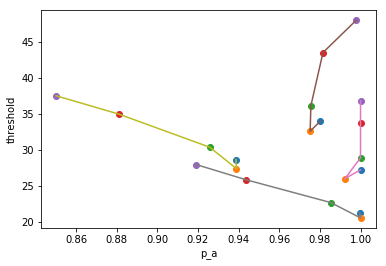

In [27]:
ta_pa_attr_dict = {'Asian': ([],[]), 'Hispanic': ([],[]), 'Black':([],[]), 'White': ([],[])}
for i in range(0,len(opt_fp_list)):
    opt_slope = opt_tp_list[i]/opt_fp_list[i]
    print('Opt ratio: ',opt_slope)
    same_opt_ratio_ta = []
    same_opt_ratio_pa = []
    for attr in list_attrs: 
        tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
        found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr) - 1)
        threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
        fpr_1 = eq_fpr[found_index_1]
        fpr_2 = eq_fpr[found_index_2]
        tpr_1 = tp_attr_list[found_index_1]
        tpr_2 = tp_attr_list[found_index_2]
        threshold_1 = threshold_attr_list[found_index_1]
        threshold_2 = threshold_attr_list[found_index_2]
        fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
        p_a = opt_fp_list[i]/fpa_opt #=opt_tp/tpa_opt
        same_opt_ratio_ta.append(threshold_a_opt)
        same_opt_ratio_pa.append(p_a)
        ta_pa_attr_dict[attr][0].append(p_a)
        ta_pa_attr_dict[attr][1].append(threshold_a_opt)
        print('Opt false positive for group '+attr+':',fpa_opt)
        print('Opt true positive for group '+attr+':',tpa_opt)
        print('Opt threshold for group '+attr+':',threshold_a_opt)
        print('Opt probablity p_a group '+attr+':',p_a)
    plt.plot(same_opt_ratio_pa,same_opt_ratio_ta,'o',label='loss_ratio='+str(opt_slope))
    
for attr,val in ta_pa_attr_dict.items():
    plt.plot(ta_pa_attr_dict[attr][0],ta_pa_attr_dict[attr][1],'-',label='atrr='+attr)

fontP = FontProperties()
fontP.set_size('small')
#plt.legend(loc='upper left',prop=fontP)

plt.xlabel('p_a')
plt.ylabel('threshold')    

plt.show()
    